In [161]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('bmh')
%matplotlib inline 
import matplotlib.dates as mdates
import plotly
plotly.offline.init_notebook_mode()

Attention: the data used here was manually collected from the posts at https://www.rivm.nl/en/news/current-information-about-novel-coronavirus-covid-19

In [162]:
df=pd.read_csv('data/overall_stats.csv',sep=";")

In [163]:
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%y') 
df = df.set_index('date')

In [164]:
df.head()

deceased  new_patients  positive_tested  total_fatalities  \
date                                                                    
2020-03-21        30           637             3631               136   
2020-03-20        30           534             2994               106   
2020-03-19        18           409             2460                76   
2020-03-18        15           346             2051                58   
2020-03-17        19           292             1705                43   

            admitted_hospital  healthcare  
date                                       
2020-03-21              836.0         NaN  
2020-03-20              643.0       725.0  
2020-03-19              489.0       594.0  
2020-03-18              408.0       485.0  
2020-03-17              314.0       389.0

/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:457: UserWarning:

matplotlib is currently using a non-GUI backend, so cannot show the figure



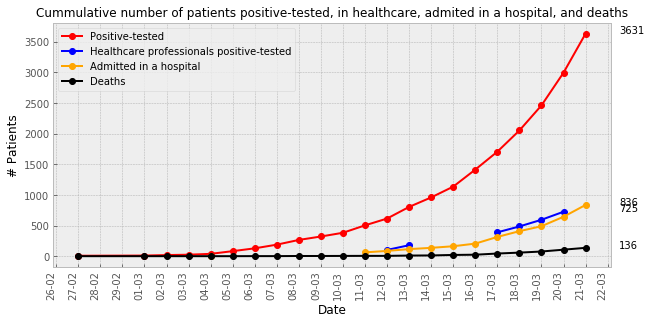

In [176]:
fig = plt.figure(figsize=(10, 5))
ax = plt.subplot2grid((1,1), (0,0))
ax.set_title("Cummulative number of patients positive-tested, in healthcare, admited in a hospital, and deaths",fontsize=12)

df['positive_tested'].plot(ax=ax,color='red',style='-o')
df['healthcare'].plot(ax=ax,color='blue',style='-o')
df['admitted_hospital'].plot(ax=ax,color='orange',style='-o')
df['total_fatalities'].plot(ax=ax,color='black',style='-o')

ax.set_xlabel("Date",color='black')
ax.set_ylabel("# Patients",color='black')
ax.xaxis.set_major_locator(mdates.DayLocator(interval = 1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
ax.tick_params(axis='x', rotation=90, labelsize=10)

plt.legend(['Positive-tested','Healthcare professionals positive-tested','Admitted in a hospital','Deaths']);
# ax.grid()

for var in (df['positive_tested'], df['healthcare'], df['admitted_hospital'],df['total_fatalities']):
    plt.annotate('%0.0f' % var.max(), xy=(1, var.max()), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')

fig.show()
# plotly.offline.iplot_mpl(fig)

In [96]:
import json
from collections import OrderedDict

with open(r'data/townships.geojson', 'r') as f:
    nl_gemeentes = json.loads(f.read(), object_hook=OrderedDict)

geo_source = GeoJSONDataSource(geojson=json.dumps(nl_gemeentes))

Reading the values of the day

In [178]:
df = pd.read_csv('data/covid19-nl-21-3-2020-14.00-3631.csv')

Merging the day values with the geo_source:

*There are several Gemeentes with different names in both lists (capital letters, remove parentesis)

In [139]:
import re
regex = re.compile(".*?\((.*?)\)")
re.findall(regex, 'Dantumadeel (Dantumadiel)')

['Dantumadiel']

In [152]:
'Dantumadeel (Dantumadiel)').strip()

'Dantumadeel'

In [155]:
df[df['Gemeente']=='Dantumadeel']

Empty DataFrame
Columns: [Gemnr, Gemeente, Aantal, BevAant, Aantal per 100.000 inwoners]
Index: []

In [153]:
missing=[]
for gemeente in nl_gemeentes['features']: 
    gemeente_name = re.sub(r"[\(\[].*?[\)\]]", "",gemeente['properties']['name']).strip()
    try:
        value = df[df['Gemeente']==gemeente_name]['Aantal'].values[0]
    except:
        value = 0
        missing.append(gemeente_name)
        
    gemeente['properties']['created_values'] = int(value)

In [154]:
missing

['Dantumadeel',
 'De Friese Meren',
 'Dongeradeel',
 'Ferwerderadeel',
 'Franekeradeel',
 'het Bildt',
 'Kollumerland en Nieuwkruisland',
 'Leeuwarderadeel',
 'Littenseradeel',
 'Menaldumadeel',
 'Tietjerksteradeel',
 'Geldermalsen',
 'Groesbeek',
 'Lingewaal',
 'Neerijnen',
 'Rijnwaarden',
 'Bedum',
 'Bellingwedde',
 'De Marne',
 'Eemsmond',
 'Grootegast',
 'Haren',
 'Hoogezand-Sappemeer',
 'Leek',
 'Marum',
 'Menterwolde',
 'Slochteren',
 'Ten Boer',
 'Vlagtwedde',
 'Winsum',
 'Zuidhorn',
 'Bergen',
 'Nuth',
 'Onderbanken',
 'Schinnen',
 'Aalburg',
 'Maasdonk',
 'Schijndel',
 'Sint-Oedenrode',
 'Veghel',
 'Werkendam',
 'Woudrichem',
 'Bergen',
 'Bussum',
 'Haarlemmerliede en Spaarnwoude',
 'Muiden',
 'Naarden',
 'Zeevang',
 'Hengelo',
 'Vianen',
 'Binnenmaas',
 'Cromstrijen',
 'Giessenlanden',
 'Korendijk',
 'Leerdam',
 'Molenwaard',
 'Noordwijkerhout',
 'Oud-Beijerland',
 'Strijen',
 'Zederik']

In [156]:
geo_source = GeoJSONDataSource(geojson=json.dumps(nl_gemeentes))

In [179]:
from bokeh.io import output_notebook, export_svgs
from bokeh.plotting import figure, show
from bokeh.models import (GeoJSONDataSource,ColumnDataSource,HoverTool,LogColorMapper,ColorBar,LogTicker)
from bokeh.palettes import Oranges9 as palette # https://bokeh.pydata.org/en/latest/docs/reference/palettes.html
output_notebook()

palette.reverse()
color_mapper = LogColorMapper(palette=palette)

TOOLS = "pan,wheel_zoom,box_zoom,reset,hover,save"

p = figure(
    title="Absolute numbers of COVID-19 positive-tested cases", 
    tools=TOOLS,
     x_axis_location=None, y_axis_location=None
)

p.patches('xs', 'ys', 
          source=geo_source,
          fill_color={'field': 'created_values', 
                      'transform': color_mapper},
          fill_alpha=1, 
          line_color="black", 
          line_width=0.5)

color_mapper = LogColorMapper(palette=palette,low=1,high=df['Aantal'].max())
color_bar = ColorBar(color_mapper=color_mapper, 
                     ticker=LogTicker(),
                     label_standoff=5, 
                     border_line_color=None, 
                     location=(0,0))
p.add_layout(color_bar, 'right')


hover = p.select_one(HoverTool)
hover.point_policy = "follow_mouse"
hover.tooltips = [
    ("Gemeente", "@name"),
    ("Cases", "@created_values"),
]

p.grid.grid_line_color = None
p.background_fill_color = None
p.border_fill_color = None
p.output_backend = "svg"

show(p)

Loading BokehJS ...

<img src="./bokeh_plot.svg?sanitize=true">